<a href="https://colab.research.google.com/github/akanksha0911/Apriori-MBA/blob/main/ARM_MBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install apyori

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [6]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [7]:
read_df = pd.read_csv("""/content/drive/MyDrive/TRAIN-ARULES.csv""")
df = read_df.copy()
df.head()

,order_id,user_id,product_name
0,1483,90,Organic Pink Lemonade Bunny Fruit Snacks
1,1483,90,Dark Chocolate Minis
2,1483,90,"Sparkling Water, Natural Mango Essenced"
3,1483,90,Peach-Pear Sparkling Water
4,1483,90,Organic Heritage Flakes Cereal


In [8]:
df.shape

(12963, 3)

In [9]:
df1 = df.groupby('order_id')['product_name'].apply(', '.join).reset_index()

In [10]:
df1.head()

,order_id,product_name
0,1483,"Organic Pink Lemonade Bunny Fruit Snacks, Dark Chocolate Minis, Sparkling Water, Natural Mango Essenced, Peach-Pear Sparkling Water, Organic Heritage Flakes Cereal, Popped Salted Caramel Granola Bars, Healthy Grains Granola Bar, Vanilla Blueberry, Flax Plus Organic Pumpkin Flax Granola, Sweet & Salty Nut Almond Granola Bars, Cool Mint Chocolate Energy Bar, Chocolate Chip Energy Bars, Trail Mix..."
1,4595,"Creme De Menthe Thins, Milk Chocolate English Toffee Miniatures Candy Bars, Baker's Pure Cane Ultrafine Sugar, Plain Bagels, Cinnamon Bread"
2,7099,"Revive Zero Vitamin Water, VitaminWater Zero™ XXX Acai Blueberry Pomegranate, Vitamin Water Zero Rise Orange, Energy Tropical Citrus Vitamin Water Drink, Zero Vitamin Water, Vitamin Water Zero Squeezed Lemonade, Total 2% Lowfat Greek Strained Yogurt with Peach, Total 2% with Strawberry Lowfat Greek Strained Yogurt, Total 0% Nonfat Greek Yogurt, Total 0% Raspberry Yogurt, Natural Artesian Water..."
3,8382,"Mountain Spring Water, Clementines, Bag, Pineapple on the Bottom Greek Yogurt, Pomegranate on the Bottom Non-Fat Greek Yogurt, Original French Vanilla Yogurt, Original Lowfat Lemon Burst Yogurt, Jet-Dry Original Rinse Aid, Jumbo Cotton Balls, Hearty Grains 100% Whole Wheat English Muffins"
4,14400,"Truffle, Sea Salt, Black Truffle, 1500 Pale Ale"


In [11]:
df1.shape

(1418, 2)

In [20]:
new_df['items'] = df1.product_name.copy()

In [25]:
new_df.head()

0    Organic Pink Lemonade Bunny Fruit Snacks, Dark Chocolate Minis, Sparkling Water, Natural Mango Essenced, Peach-Pear Sparkling Water, Organic Heritage Flakes Cereal, Popped Salted Caramel Granola Bars, Healthy Grains Granola Bar, Vanilla Blueberry, Flax Plus Organic Pumpkin Flax Granola, Sweet & Salty Nut Almond Granola Bars, Cool Mint Chocolate Energy Bar, Chocolate Chip Energy Bars, Trail Mix...
1                                                                                                                                                                                                                                                                        Creme De Menthe Thins, Milk Chocolate English Toffee Miniatures Candy Bars, Baker's Pure Cane Ultrafine Sugar, Plain Bagels, Cinnamon Bread
2    Revive Zero Vitamin Water, VitaminWater Zero™ XXX Acai Blueberry Pomegranate, Vitamin Water Zero Rise Orange, Energy Tropical Citrus Vitamin Water Drink, Zero Vitamin Water, Vitamin Wat

In [34]:
# new = new_df.items.str.split(",",expand=True)
new = new_df["items"].str.split(",", expand = True)
   

In [35]:
new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,Organic Pink Lemonade Bunny Fruit Snacks,Dark Chocolate Minis,Sparkling Water,Natural Mango Essenced,Peach-Pear Sparkling Water,Organic Heritage Flakes Cereal,Popped Salted Caramel Granola Bars,Healthy Grains Granola Bar,Vanilla Blueberry,Flax Plus Organic Pumpkin Flax Granola,Sweet & Salty Nut Almond Granola Bars,Cool Mint Chocolate Energy Bar,Chocolate Chip Energy Bars,Trail Mix Fruit & Nut Chewy Granola Bars,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Creme De Menthe Thins,Milk Chocolate English Toffee Miniatures Candy Bars,Baker's Pure Cane Ultrafine Sugar,Plain Bagels,Cinnamon Bread,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Revive Zero Vitamin Water,VitaminWater Zero™ XXX Acai Blueberry Pomegranate,Vitamin Water Zero Rise Orange,Energy Tropical Citrus Vitamin Water Drink,Zero Vitamin Water,Vitamin Water Zero Squeezed Lemonade,Total 2% Lowfat Greek Strained Yogurt with Peach,Total 2% with Strawberry Lowfat Greek Strained Yogurt,Total 0% Nonfat Greek Yogurt,Total 0% Raspberry Yogurt,Natural Artesian Water,Original Turkey Jerky,Teriyaki Turkey Jerky,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Mountain Spring Water,Clementines,Bag,Pineapple on the Bottom Greek Yogurt,Pomegranate on the Bottom Non-Fat Greek Yogurt,Original French Vanilla Yogurt,Original Lowfat Lemon Burst Yogurt,Jet-Dry Original Rinse Aid,Jumbo Cotton Balls,Hearty Grains 100% Whole Wheat English Muffins,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Truffle,Sea Salt,Black Truffle,1500 Pale Ale,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [36]:
new.shape

(1418, 49)

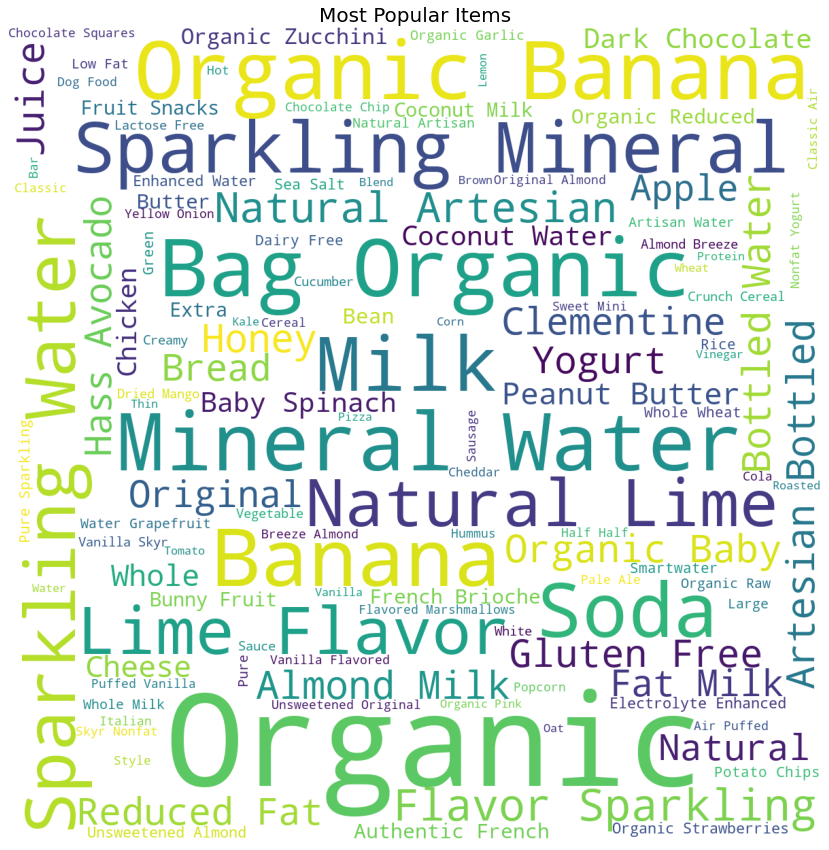

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(new[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

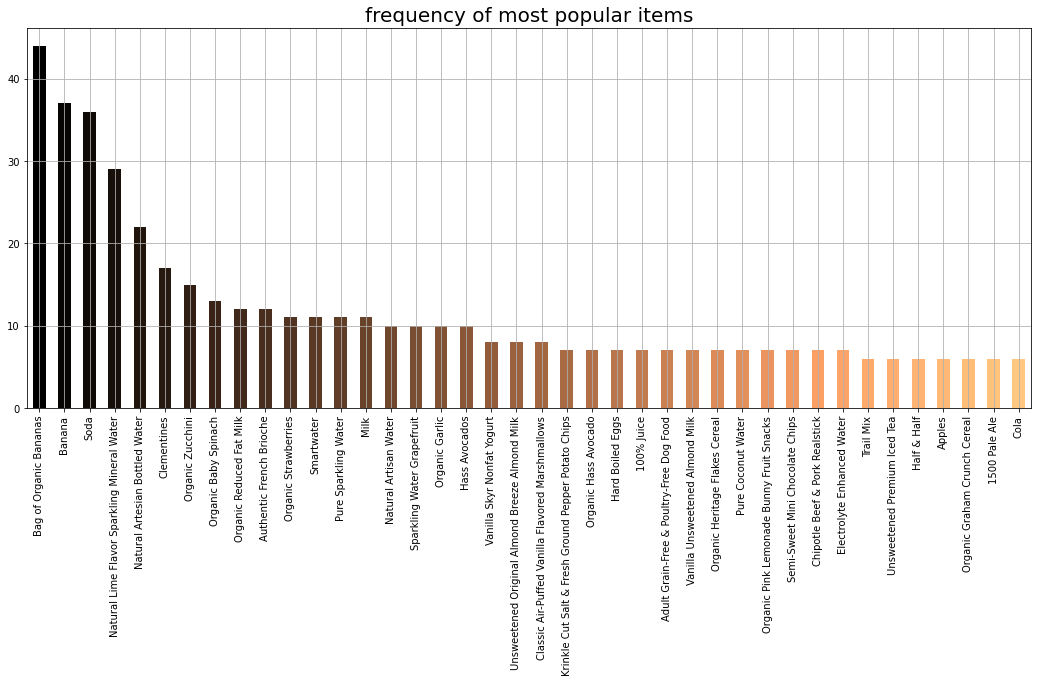

In [48]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
new[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [45]:
#Getting the list of transactions from the dataset
transactions = []
for i in range(0, 1418):
    transactions.append([str(new.values[i,j]) for j in range(0, 49)])

In [43]:
print(type(transactions))


<class 'list'>


In [42]:
print(transactions)

[['Organic Pink Lemonade Bunny Fruit Snacks', ' Dark Chocolate Minis', ' Sparkling Water', ' Natural Mango Essenced', ' Peach-Pear Sparkling Water', ' Organic Heritage Flakes Cereal', ' Popped Salted Caramel Granola Bars', ' Healthy Grains Granola Bar', ' Vanilla Blueberry', ' Flax Plus Organic Pumpkin Flax Granola', ' Sweet & Salty Nut Almond Granola Bars', ' Cool Mint Chocolate Energy Bar', ' Chocolate Chip Energy Bars', ' Trail Mix Fruit & Nut Chewy Granola Bars', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'], ['Creme De Menthe Thins', ' Milk Chocolate English Toffee Miniatures Candy Bars', " Baker's Pure Cane Ultrafine Sugar", ' Plain Bagels', ' Cinnamon Bread', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'No

In [54]:
# Training Apriori algorithm on the dataset
rule_list = apriori(transactions, min_support = 0.0045, min_confidence =0.3, min_lift =3, min_length = 2)
association_results = list(rule_list)

In [55]:
for item in association_results:

    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Streaming output truncated to the last 5000 lines.
Rule:  Organic Chunky Vegetable Soup ->  Grade A Extra Large Eggs
Support: 0.006346967559943582
Confidence: 0.3103448275862069
Lift: 40.00626959247649
Rule:  Sliced Wheat Bread ->  Grade A Extra Large Eggs
Support: 0.004936530324400564
Confidence: 0.875
Lift: 42.78448275862069
Rule:  Strawberries ->  Grade A Extra Large Eggs
Support: 0.007052186177715092
Confidence: 0.3448275862068966
Lift: 11.371291098636728
Rule:  Grade A Extra Large Eggs -> Natural Lime Flavor Sparkling Mineral Water
Support: 0.01763046544428773
Confidence: 0.8620689655172414
Lift: 42.15219976218788
Rule:  Half & Half ->  Whole Milk
Support: 0.004936530324400564
Confidence: 0.46666666666666673
Lift: 20.052525252525257
Rule:  Hazelnut Bite Size Wafer Cookies ->  Strawberry Preserves
Support: 0.005641748942172073
Confidence: 1.0
Lift: 61.652173913043484
Rule:  Healthy Grains Granola Bar ->  Maple Pumpkin Seeds with Sea Salt Chewy with a Crunch Granola Bars
Support: 0.